# Table of Contents
 <p><div class="lev1 toc-item"><a href="#概要" data-toc-modified-id="概要-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>概要</a></div><div class="lev1 toc-item"><a href="#Mapleでの解" data-toc-modified-id="Mapleでの解-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mapleでの解</a></div><div class="lev1 toc-item"><a href="#二分法とNewton法の原理" data-toc-modified-id="二分法とNewton法の原理-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>二分法とNewton法の原理</a></div><div class="lev2 toc-item"><a href="#二分法(bisection)" data-toc-modified-id="二分法(bisection)-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>二分法(bisection)</a></div><div class="lev2 toc-item"><a href="#Newton法(あるいはNewton-Raphson法)" data-toc-modified-id="Newton法(あるいはNewton-Raphson法)-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Newton法(あるいはNewton-Raphson法)</a></div><div class="lev1 toc-item"><a href="#二分法とNewton法のコード" data-toc-modified-id="二分法とNewton法のコード-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>二分法とNewton法のコード</a></div><div class="lev2 toc-item"><a href="#二分法(bisection)" data-toc-modified-id="二分法(bisection)-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>二分法(bisection)</a></div><div class="lev2 toc-item"><a href="#Newton法(あるいはNewton-Raphson法)" data-toc-modified-id="Newton法(あるいはNewton-Raphson法)-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Newton法(あるいはNewton-Raphson法)</a></div><div class="lev1 toc-item"><a href="#収束性と安定性" data-toc-modified-id="収束性と安定性-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>収束性と安定性</a></div><div class="lev1 toc-item"><a href="#収束判定条件" data-toc-modified-id="収束判定条件-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>収束判定条件</a></div><div class="lev4 toc-item"><a href="#epsilon,-\deltaを説明するための図" data-toc-modified-id="epsilon,-\deltaを説明するための図-6001"><span class="toc-item-num">6.0.0.1&nbsp;&nbsp;</span>$\epsilon, \delta$を説明するための図</a></div><div class="lev1 toc-item"><a href="#2変数関数の場合" data-toc-modified-id="2変数関数の場合-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>2変数関数の場合</a></div><div class="lev1 toc-item"><a href="#例題:二分法とNewton法の収束性" data-toc-modified-id="例題:二分法とNewton法の収束性-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>例題:二分法とNewton法の収束性</a></div><div class="lev3 toc-item"><a href="#解答例" data-toc-modified-id="解答例-801"><span class="toc-item-num">8.0.1&nbsp;&nbsp;</span>解答例</a></div><div class="lev1 toc-item"><a href="#課題" data-toc-modified-id="課題-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>課題</a></div>

代数方程式(fsolve)



# 概要



代数方程式の解$f(x)=0$を数値的に求めることを考える．標準的な
> 二分法(bisection method)とニュートン法(Newton's method)

の考え方と例を説明し，
>収束性(convergency)と安定性(stability)

について議論する．さらに収束判定条件について言及する．


二分法のアイデアは単純．中間値の定理より連続な関数では，関数の符号が変わる二つの変数の間には根が必ず存在する．したがって，この方法は収束性は決して高くはないが，
確実．一方，Newton法は関数の微分を用いて収束性を速めた方法である．しかし，不幸にして収束しない場合や微分に時間がかかる場合があり，初期値や使用対象には注意
を要する．




# Mapleでの解


Mapleでは代数方程式の解は，fsolveで求まる．

$$
x^2-4x+1 = 0
$$
の解を考える．未知の問題では時として異常な振る舞いをする関数を相手にすることがあるので，先ずは関数の概形を見ることを常に心がけるべき．

Mapleでは代数方程式の解は，fsolveで求まる．

$$
x^2-4x+1 = 0
$$
の解を考える．未知の問題では時として異常な振る舞いをする関数を相手にすることがあるので，先ずは関数の概形を見ることを常に心がけるべき．

```maple
> restart;
> func:=x->x^2-4*x+1;
```
$$
{\it func}\, := \,x\mapsto {x}^{2}-4\,x+1
$$
```maple
> plot(func(z),z=-1..7);
```

|{{attach_view(C2_fsolveplot2d1.png,)}}|
|:----|

In [38]:
from sympy import *

x = symbols('x')

def func(x):
  return x**2-4*x+1

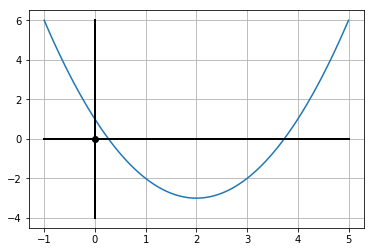

In [39]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1, 5, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = func(x)
plt.plot(x, y)

plt.plot(0, 0, "o", color = 'k')
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot([-1, 5], [0, 0], color='k', linestyle='-', linewidth=2)
plt.plot([0, 0], [-4, 6], color='k', linestyle='-', linewidth=2)
pyplot.grid()
pyplot.show()

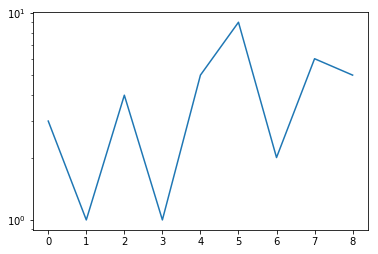

In [6]:
import matplotlib.pyplot as plt

plt.plot( [3,1,4,1,5,9,2,6,5] )
plt.yscale("log") # y軸を対数目盛に

plt.show()

もし，解析解が容易に求まるなら，その結果を使うほうがよい．Maple scriptの解析解を求めるsolveでは，

```maple
> solve(func(x)=0,x);
```


|　　　　　　　　 | 　　　　　　　　  |
|:----|:----|
|　　　　　　　　 | 　　　　　　　　  |


と即座に求めてくれる．数値解は以下の通り求められる．
```maple
> fsolve(func(x)=0,x);
```

|　　　　　　　　 | 　　　　　　　　  |
|:----|:----|
|　　　　　　　　 | 　　　　　　　　  |

In [40]:
from sympy import *

x = symbols('x')

def func(x):
  return x**2-4*x+1

solve(func(x), x)

[-sqrt(3) + 2, sqrt(3) + 2]

# 二分法とNewton法の原理


## 二分法(bisection) 


二分法は領域の端$x_1, x_2$で関数値$f(x_1),f(x_2)$を求め，中間の値を次々に計算して，解を囲い込んでいく方法である．
```maple
> plot(func(z),z=0..0.8,gridlines=true);
```

|{{attach_view(C2_fsolveplot2d2.png,)}}|
|:----|



|$x_1$ | $x_2$ |$f(x_1)$ | $f(x_2)$  |
|:----|:----|:----|:----|
|0.0 | 0.8 |　　　　　 |　　　　　  |
|　　　　|  　　　　|  　　　　| 　　　　 |
|　　　　|  　　　　|  　　　　| 　　　　 |
|　　　　|  　　　　|  　　　　| 　　　　 |






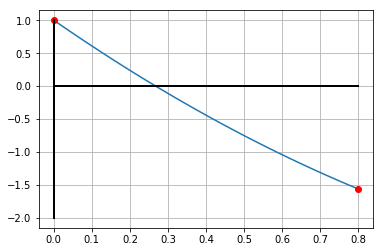

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def func(x):
    return x**2-4*x+1

x = np.linspace(0, 0.8, 100)  #0から2πまでの範囲を100分割したnumpy配列
y = func(x)
plt.plot(x, y)

plt.plot(0, func(0), "o", color = 'r')
plt.plot(0.8, func(0.8), "o", color = 'r')
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot([0, 0.8], [0, 0], color='k', linestyle='-', linewidth=2)
plt.plot([0, 0], [-2, 1], color='k', linestyle='-', linewidth=2)
pyplot.grid()
pyplot.show()

## Newton法(あるいはNewton-Raphson法) 


Newton法は最初の点$x_1$から接線をひき，それが$x$軸(y=0)と交わった点を新たな点$x_2$とする．さらにそこでの接線を求めて...

という操作を繰り返しながら解を求める方法である．関数の微分をdf(x)とすると，これらの間には

|　　　　　　　　　　　　　　　|
|:----|

という関係が成り立つ．
```maple
> df:=unapply(diff(func(x),x),x);
```

|　　　　　　　　　　　　　　　|
|:----|


```maple
> with(plots):with(plottools): 
> x1:=1.0:x0:=0.0: 
> p:=plot(func(z),z=0..1.1):
> p1:=plot(df(x1)*(z-x1)+func(x1),z=0..1.1,color=blue):
> p2:=[disk([x1,func(x1)],0.02), disk([x0,0],0.02)]:
> display(p,p1,p2,gridlines=true);
```

|{{attach_view(C2_fsolveplot2d3.png,)}}|
|:----|



|$x_1$ |$f(x_1)$ | $df(x_1)$  |
|:----|:----|:----|
|1.0　| 　　　　 | 　　　　  |
|　　　　　　　| 　　　　　　　 | 　　　　　　　  |
|　　　　　　　| 　　　　　　　 | 　　　　　　　  |
|





In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

x = symbols('x')

def func(x):
    return x**2-4*x+1

def df(x):
    return diff(func(x), x)

pprint(df(x))

x1 = 1.0
df(x).subs(x, x1)*(x-x1)+func(x1)

def line_f(x, x1):
    return df(x).subs(x, x1)*(x-x1)+func(x1)


pprint(line_f(x, 1.0))
x0 = 0.0
x1 = 1.0

y0 = line_f(x, x1).subs(x, x0)
y1 = line_f(x, x1).subs(x, x1)
print(y0, y1)

yy0 = line_f(x, x0).subs(x, x0)
yy1 = line_f(x, x0).subs(x, x1)
print(yy0, yy1)

2⋅x - 4
-2.0⋅x
0 -2.00000000000000
1.00000000000000 -3.00000000000000


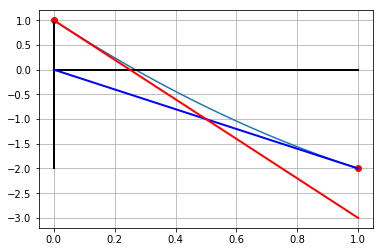

In [91]:
x = np.linspace(x0, x1, 100)
y = func(x)
plt.plot(x, y)

plt.plot(x0, func(x0), "o", color = 'r')
plt.plot(x1, func(x1), "o", color = 'r')
# plot([x1, x2], [y1, y2], color='k', linestyle='-', linewidth=2)
plt.plot([x0, x1], [0, 0], color='k', linestyle='-', linewidth=2)
plt.plot([0, 0], [func(x0), func(x1)], color='k', linestyle='-', linewidth=2)

plt.plot([x0, x1], [y0, y1], color='b', linestyle='-', linewidth=2)

plt.plot([x0, x1], [yy0, yy1], color='r', linestyle='-', linewidth=2)

pyplot.grid()
pyplot.show()

# 二分法とNewton法のコード


## 二分法(bisection) 


```maple
> x1:=0: x2:=0.8: 
  f1:=func(x1): f2:=func(x2): 
  for i from 1 to 5 do 
    x:=(x1+x2)/2;
    f:=func(x); 
    if f*f1>=0.0 then 
      x1:=x; f1:=f; 
    else 
      x2:=x; f2:=f; 
    end if;
    printf("%20.15f, %20.15f\n",x,f); 
  end do:
```
```maple
0.400000000000000, -0.440000000000000 
0.200000000000000,  0.240000000000000
0.300000000000000, -0.110000000000000 
0.250000000000000,  0.062500000000000
0.275000000000000, -0.024375000000000
```




In [122]:
x1, x2 = 0.0, 0.8
f1, f2 = func(x1), func(x2)
print('%-6s %-6s %-6s %-6s'  % ('x1','x2','f1','f2'))
print('%-6.3f %-6.3f %-6.3f %-6.3f' % (x1,x2,f1,f2))
for i in range(1, 5):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
    else:
        x2, f2 = x, f
    print('%-6.3f %-6.3f %-6.3f %-6.3f' % (x1,x2,f1,f2))

x1     x2     f1     f2    
0.000  0.800  1.000  -1.560
0.000  0.400  1.000  -0.440
0.200  0.400  0.240  -0.440
0.200  0.300  0.240  -0.110
0.250  0.300  0.062  -0.110


## Newton法(あるいはNewton-Raphson法) 



```maple
> dfunc:=unapply(diff(func(z),z),z);
```
$$
{\it dfunc} := z\mapsto 2 z - 4
$$
```maple
> x:=1: f:=func(x): 
  printf("%15.10f, %+24.25f\n",x,f); 
  for i from 1 to 5 do
    x:=x-f/dfunc(x); 
    f:=func(x); 
    printf("%15.10f, %+24.25f\n",x,f); 
  end do:
```
```maple
1.0000000000, -2.0000000000000000000000000 
0.0000000000, +1.0000000000000000000000000 
0.2500000000, +0.0625000000000000000000000
0.2678571429, +0.0003188775510000000000000 
0.2679491900, +0.0000000084726737970000000 
0.2679491924, +0.0000000000000000059821834
```

以下のようにDigitsを変更すれば，Mapleでは浮動小数点演算の有効数字を変えることができる．
```maple
> Digits:=40;
```
$$
40
$$





# 収束性と安定性



実際のコードの出力からも分かる通り，解の収束の速さは2つの手法で極端に違う．2分法では一回の操作で解の区間が半分になる．このように繰り返しごとに誤差幅が前回の誤差幅の定数($<1$)倍になる方法は1次収束(linear convergence)するという．Newton法では関数・初期値が素直な場合($f^{\prime}(x) <> 0$)に，収束が誤差の2乗に比例する2次収束を示す．以下はその導出を示した．


```maple
> restart; ff:=subs(xi-x[f]=ei,series(f(xi),xi=x[f],4));
```

$$
{\it ff}\, := \,f \left( x_{{f}} \right) +D \left( f \right)  \left( x_{{f}} \right) {\it ei}+\frac{1}{2}\,  D^{ \left( 2 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2} +\frac{1}{6}\, 
D^{ \left( 3 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{3}+O \left( {{\it ei}}^{4} \right)
$$
```maple
> dff:=subs({0=x[f],x=ei},series(diff(f(x),x),x,3));
```
$$
{\it dff}\, := \,D \left( f \right)  \left( x_{{f}} \right) + 
D^{ \left( 2 \right) } \left( f \right)  \left( x_{{f}} \right) {\it ei}+
\frac{1}{2}\, D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2} +O \left( {{\it ei}}^{3} \right)
$$
```maple
> ei1:=ei-ff/dff;
```
$$
{\it ei1}\, := \,{\it ei}-{\frac {f \left( x_{{f}} \right) +D \left( f \right)  \left( x_{{f}} \right) {\it ei}+\frac{1}{2}\,  D^{ \left( 2 \right) }  \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}+\frac{1}{6}\,  D^{ \left( 3 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{3}+O \left( {{\it ei}}^{4} \right) }{D \left( f \right)  \left( x_{{f}} \right) +  D^{ \left( 2 \right) }  \left( f \right)  \left( x_{{f}} \right) {\it ei} +\frac{1}{2}\, D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}+O \left( {{\it ei}}^{3} \right) }}
$$
```maple
> ei2:=simplify(convert(ei1,polynom));
```
$$
{\it ei2}\, := \,\frac{1}{3}\,\frac {3\, D^{ \left( 2 \right) }  \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}+2\, D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{3}
-6\,f \left( x_{{f}} \right) }{2\,D \left( f \right)  \left( x_{{f}} \right) +2\, D^{ \left( 2 \right) }   \left( f \right)  \left( x_{{f}} \right) {\it ei}+ D^{ \left( 3 \right) } \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}
}
$$
```maple
> ei3:=series(ei2,ei,3);
```
$$
{\it ei3}\, := \,-{\frac {f \left( x_{{f}} \right) }{D \left( f \right)  \left( x_{{f}} \right) }}+{\frac {f \left( x_{{f}} \right)  \left( D^{ \left( 2 \right) } \right)  \left( f \right)  \left( x_{{f}} \right) {\it ei}}{ \left( D \left( f \right)  \left( x_{{f}} \right)  \right) ^{2}}}+ \notag \\
\frac{1}{6}\, \frac{ 3\, \left( D^{ \left( 2 \right) } \right)  \left( f \right)  \left( x_{{f}} \right) +3\,{\frac {f \left( x_{{f}} \right)  \left( D^{ \left( 3 \right) } \right)  \left( f \right)  \left( x_{{f}} \right) }{D \left( f \right)  \left( x_{{f}} \right) }}-6\,{\frac {f \left( x_{{f}} \right)  \left(  \left( D^{ \left( 2 \right) } \right)  \left( f \right)  \left( x_{{f}} \right)  \right) ^{2}}{ \left( D \left( f \right)  \left( x_{{f}} \right)  \right) ^{2}}}}
{ \left( D \left( f \right)  \left( x_{{f}} \right)  \right)}{{\it ei}}^{2} +O \left( {{\it ei}}^{3} \right)
$$
```maple
> subs(f(x[f])=0,ei3);
```
$$
\frac{1}{2}\,{\frac {  D^{ \left( 2 \right) }   \left( f \right)  \left( x_{{f}} \right) {{\it ei}}^{2}}{D \left( f \right)  \left( x_{{f}} \right) }}+O \left( {{\it ei}}^{3} \right)
$$
注意すべきは，この収束性には一回の計算時間の差は入っていないことである．Newton法で解析的に微分が求まらない場合，数値的に求めるという手法がとられるが，これにかかる計算時間はばかにできない．二分法を改良した割線法(secant method)がより速い場合がある(NumRecipe9章参照)．

二分法では，収束は遅いが，正負の関数値の間に連続関数では必ず解が存在するという意味で解が保証されている．しかし，Newton法では，収束は速いが，必ずしも素直に解に収束するとは限らない．解を確実に囲い込む，あるいは解に近い値を初期値に選ぶ手法が種々考案されている．解が安定であるかどうかは，問題，解法，初期値に大きく依存する．収束性と安定性のコントロールが数値計算のツボとなる．





# 収束判定条件



どこまで値が解に近づけば計算を打ち切るかを決める条件を収束判定条件と呼ぶ．以下のような条件がある．


|
|:----|:----|:----|
|
|$\varepsilon$(イプシロン，epsilon)法 |   |
|$\delta$(デルタ，delta)法 |   |
|占部法 | \left|f(x_i)\right|$とする．  ||
|
|





#### $\epsilon, \delta$を説明するための図 


```maple
> with(plots):with(plottools):
> f2:=x->0.4*(x^2-4*x+1):x1:=0.25:x0:=0.4:
  p1:=plot([f2(z),f2(x1)],z=0.2..0.5):
  p2:=[disk([x1,f2(x1)],0.005),disk([x0,f2(x0)],0.005)]:
  l1:=line([x0,f2(x0)],[x0,f2(x1)]):
  t1 := textplot([0.45,0.0,`epsilon`],align=above):
  t2 := textplot([0.325,0.05,`delta`],align=below):
> display(p,p1,p2,l1,t1,t2);
```

|{{attach_view(C2_fsolveplot2d4.png,)}}|
|:----|






# 2変数関数の場合



2変数の関数では，解を求める一般的な手法は無い．この様子は実際に2変数の関数で構成される面の様子をみれば納得されよう．
```maple
> restart;
> f:=(x,y)->4*x+2*y-6*x*y; g:=(x,y)->10*x-2*y+1;
```
$$
f\, := \,( {x,y} )\mapsto 4\,x+2\,y-6\,xy \notag \\
g\, := \,( {x,y} )\mapsto 10\,x-2\,y+1 \notag
$$
```maple
> p1:=plot3d({f(x,y)},x=-2..2,y=-2..2,color=red):
  p2:=plot3d({g(x,y)},x=-2..2,y=-2..2,color=blue):
  p3:=plot3d({0},x=-2..2,y=-2..2,color=gray):
  with(plots):
  display([p1,p2,p3],axes=boxed,orientation=[-150,70]);
```

|{{attach_view(C2_fsolveplot3d5.png,)}}|
|:----|


解のある程度近くからは，Newton法で効率良く求められる．
```maple
> fsolve({f(x,y)=0,g(x,y)=0},{x,y});
```
$$
\left\{ x=- 0.07540291160,y= 0.1229854420 \right\}
$$




# 例題:二分法とNewton法の収束性



代数方程式に関する次の課題に答えよ．(2004年度期末試験)
1.  $\exp(-x) = x^2$を二分法およびニュートン法で解け.
1.  $n$回目の値$x_n$と小数点以下10桁まで求めた値$x_f=0.7034674225$との差$\Delta x_n$の絶対値(abs)のlogを$n$の関数としてプロットし，その収束性を比較せよ．また，その傾きの違いを両解法の原理から説明せよ.




### 解答例 


計算精度を40桁にしておく．funcで関数を定義．
```maple
> restart; Digits:=40: func:=unapply(exp(-x)-x^2,x);
```
$$
func\, := \,x\mapsto {e}^{-x}-{x}^{2}
$$
先ずは，関数をplotして概形を確認．
```maple
> plot(func(x),x=-5..5,y=-10..10);
```

|{{attach_view(fsolveExampleplot2d1.png,)}}|
|:----|

Mapleの組み込みコマンドで正解を確認しておく．
```maple
> x0:=fsolve(func(x)=0,x);
```
$$
0.7034674224983916520498186018599021303429
$$
テキストからプログラムをコピーして走らせてみる．環境によっては，printf分の中の"\"が文字化けしているので修正．
```maple
> x1:=0: x2:=0.8: res1:=[]:
  f1:=func(x1): f2:=func(x2):
  for i from 1 to 20 do
    x:=(x1+x2)/2;
    f:=func(x);
    if f*f1>=0.0 then
      x1:=x; f1:=f;
    else
      x2:=x; f2:=f;
    end if;
    printf("%20.15f, %20.15f\n",x,f); 
    res1:=[op(res1),[i,abs(x-x0)]]:
  end do:
```
```maple
0.400000000000000, 0.510320046035639 
0.600000000000000, 0.188811636094026
0.700000000000000, 0.006585303791410 
0.750000000000000, -0.090133447258985
0.725000000000000, -0.041300431044638 

中略

0.703468322753906, -0.000001712107681 
0.703467559814453, -0.000000261147873
```
プロットのためにリストをres1で作成している．

同様にNewton法での結果をres2に入れる．
```maple
> dfunc:=unapply(diff(func(z),z),z);
```
$$
{\it dfunc}\, := \,z\mapsto -{{e}^{-z}}-2\,z
$$
```maple
> x:=1.0: f:=func(x): 
  printf("%15.10f, %+24.25f\n",x,f); 
  res2:=[[1,abs(x-x0)]]:
  for i from 2 to 5 do
    x:=x-f/dfunc(x);
    f:=func(x);
    printf("%15.10f, %+24.25f\n",x,f); 
    res2:=[op(res2),[i,abs(x-x0)]]:
  end do:
```
```maple
1.0000000000, -0.6321205588285576784044762 
0.7330436052, -0.0569084480040254074684576 
0.7038077863, -0.0006473915387465014761973
0.7034674683, -0.0000000871660305624231097
0.7034674225, -0.0000000000000015809178420
```

res1, res2を片対数プロットして同時に表示．
```maple
> l1:=logplot(res1);
> l2:=logplot(res2);
> display(l1,l2);
```

|{{attach_view(fsolveExampleplot2d2.png,)}}|
|:----|

2分法で求めた解は，Newton法で求めた解よりもゆっくりと精密解へ収束している．これは，二分法が原理的に計算回数について一次収束なのに対して，Newton法は2次収束であるためである．解の差($\delta$)だけでなく，関数値$f(x),\epsilon$をとっても同様の振る舞いを示す．




# 課題



1.  Newton法の$f(x), df(x)$の関係を示す式を導け．
1.  次の関数 $f(x) = \exp(-x)-2\exp(-2x)$ の解を二分法，Newton法で求めよ．
1.  代数方程式に関する次の課題に答えよ．(2004年度期末試験)
1.  $\exp(-x) = x^2$を二分法およびニュートン法で解け.
1.  $n$回目の値$x_n$と小数点以下10桁まで求めた値$x_f=0.7034674225$との差$\Delta x_n$の絶対値(abs)のlogを$n$の関数としてプロットし，その収束性を比較せよ．また，その傾きの違いを両解法の原理から説明せよ.
1.  次の方程式 $f(x) = x^4-x-0.12$ の正数解を二分法で求めよ．(2008年度期末試験)
1.  収束条件がうまく機能しない例を示せ．
1.  割線法は，微分がうまく求まらないような場合に効率がよい，二分法を改良した方法である．二分法では新たな点を元の2点の中点に取っていた．そのかわりに下図に示すごとく，新たな点を元の2点を直線で内挿した点に取る．二分法のコードを少し換えて，割線法のコードを書け．また，収束の様子を二分法，Newton法と比べよ．
```maple
> func:=x->x^2-4*x+1: x1:=0: x2:=2: f1:=func(x1): f2:=func(x2):
> plot({(z-x1)*(f1-f2)/(x1-x2)+f1,func(z)},z=0..2);
```

|{{attach_view(C2_fsolveplot2d6.png,)}}|
|:----|

1.  次の方程式 $f(x) = \cos(x)-x^2$ の正数解を二分法で求めよ．割線法でも求め，収束性を比べよ．(2009年度期末試験)
1.  次の方程式 $f(x)=x^3-3x+3$の解をニュートン法で求めよ．初期値をそれぞれ$x = -3, x = 2$とした時を比べ，その差について論ぜよ．(2010年度期末試験)
